<a href="https://colab.research.google.com/github/sreedharsiddhu/Project_ML-/blob/main/22MAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Load the datasets for the three airports
file_grazzanise = '/content/Grazzanise airport.xlsx'
file_treviso = '/content/Trapani airport.xlsx'
file_trapani = '/content/Treviso airport.xlsx'

Grazzanise_Airport = pd.read_excel(file_grazzanise)
Treviso_Airport = pd.read_excel(file_treviso)
Trapani_Airport = pd.read_excel(file_trapani)


In [2]:
# Display the first few rows of each dataset
print("Grazzanise Airport Data:")
print(Grazzanise_Airport.head())
print("\nTreviso Airport Data:")
print(Treviso_Airport.head())
print("\nTrapani Airport Data:")
print(Trapani_Airport.head())


Grazzanise Airport Data:
               date  idstazione    lon    lat  altezza  pressure  \
0  14/03/1996 12:00       16253  14.07  41.05       10  100790.0   
1  16/01/1997 18:00       16253  14.07  41.05       10  102290.0   
2  19/06/1997 06:00       16253  14.07  41.05       10  100850.0   
3  30/05/1998 18:00       16253  14.07  41.05       10  101520.0   
4  15/12/1998 21:00       16253  14.07  41.05       10  102580.0   

   three_hour_pressure_change  char_pressure_tendency  wind_direction  \
0                        20.0                     0.0            70.0   
1                        20.0                     3.0             0.0   
2                      -380.0                     6.0             0.0   
3                        10.0                     0.0           260.0   
4                        60.0                     1.0           100.0   

   wind_speed  relative_humidity  visibility  present_weather  past_weather1  \
0      7.7752                NaN     15000.0   

In [3]:
# Function to print missing values
def print_missing_values(data, airport_name):
    total_missing = data.isnull().sum().sum()
    print(f"Total missing values in {airport_name}: {total_missing}")
    missing_values_per_column = data.isnull().sum()
    print(f"\nMissing values per column in {airport_name}:")
    print(missing_values_per_column)

print_missing_values(Grazzanise_Airport, "Grazzanise_Airport")
print_missing_values(Treviso_Airport, "Treviso_Airport")
print_missing_values(Trapani_Airport, "Trapani_Airport")


Total missing values in Grazzanise_Airport: 157463

Missing values per column in Grazzanise_Airport:
date                              0
idstazione                        0
lon                               0
lat                               0
altezza                           0
pressure                         29
three_hour_pressure_change      216
char_pressure_tendency         2818
wind_direction                   40
wind_speed                       40
relative_humidity             69191
visibility                       21
present_weather                  35
past_weather1                    40
past_weather2                    42
cloud_cover                      64
height_of_base_of_cloud       17669
cloud_type                        0
drybulb                       33632
dewpoint                      33626
dtype: int64
Total missing values in Treviso_Airport: 410225

Missing values per column in Treviso_Airport:
date                               0
idstazione                        

In [4]:
# Fill 'height_of_base_of_cloud' with mode (most frequent value)
mode_value = 800
Grazzanise_Airport['height_of_base_of_cloud'].fillna(mode_value, inplace=True)
Treviso_Airport['height_of_base_of_cloud'].fillna(mode_value, inplace=True)
Trapani_Airport['height_of_base_of_cloud'].fillna(mode_value, inplace=True)

# Drop rows with missing values in 'drybulb' and 'dewpoint'
Grazzanise_Airport.dropna(subset=['drybulb', 'dewpoint'], inplace=True)
Treviso_Airport.dropna(subset=['drybulb', 'dewpoint'], inplace=True)
Trapani_Airport.dropna(subset=['drybulb', 'dewpoint'], inplace=True)


In [5]:
print("Summary statistics for Grazzanise_Airport:")
print(Grazzanise_Airport.describe())
print("\nSummary statistics for Treviso_Airport:")
print(Treviso_Airport.describe())
print("\nSummary statistics for Trapani_Airport:")
print(Trapani_Airport.describe())


Summary statistics for Grazzanise_Airport:
       idstazione           lon           lat  altezza       pressure  \
count     35558.0  35558.000000  35558.000000  35558.0   35556.000000   
mean      16253.0     14.073341     41.053341     10.0  101479.943469   
std           0.0      0.004717      0.004717      0.0     684.264067   
min       16253.0     14.070000     41.050000     10.0   98230.000000   
25%       16253.0     14.070000     41.050000     10.0  101100.000000   
50%       16253.0     14.070000     41.050000     10.0  101470.000000   
75%       16253.0     14.080000     41.060000     10.0  101880.000000   
max       16253.0     14.080000     41.060000     10.0  103590.000000   

       three_hour_pressure_change  char_pressure_tendency  wind_direction  \
count                35400.000000            35400.000000    35546.000000   
mean                     1.433898                4.251356      160.027289   
std                     97.775364                2.490205      121.2

In [6]:
# Get the column names of each dataset
cols1 = set(Grazzanise_Airport.columns)
cols2 = set(Treviso_Airport.columns)
cols3 = set(Trapani_Airport.columns)

# Find the common column names
common_cols = cols1.intersection(cols2).intersection(cols3)
print("Common column names in all three datasets:")
print(common_cols)

# Find the unique column names in each dataset
unique_cols1 = cols1 - common_cols
unique_cols2 = cols2 - common_cols
unique_cols3 = cols3 - common_cols

print("\nUnique column names in Grazzanise_Airport:")
print(unique_cols1)
print("\nUnique column names in Treviso_Airport:")
print(unique_cols2)
print("\nUnique column names in Trapani_Airport:")
print(unique_cols3)


Common column names in all three datasets:
{'lon', 'char_pressure_tendency', 'past_weather2', 'cloud_type', 'height_of_base_of_cloud', 'wind_direction', 'cloud_cover', 'present_weather', 'relative_humidity', 'pressure', 'lat', 'drybulb', 'dewpoint', 'date', 'three_hour_pressure_change', 'altezza', 'wind_speed', 'visibility', 'past_weather1', 'idstazione'}

Unique column names in Grazzanise_Airport:
set()

Unique column names in Treviso_Airport:
set()

Unique column names in Trapani_Airport:
set()


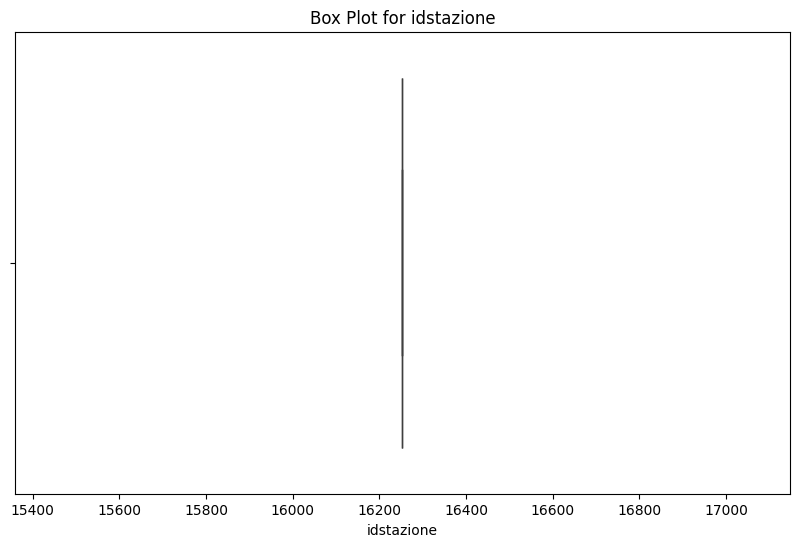

No outliers detected in idstazione


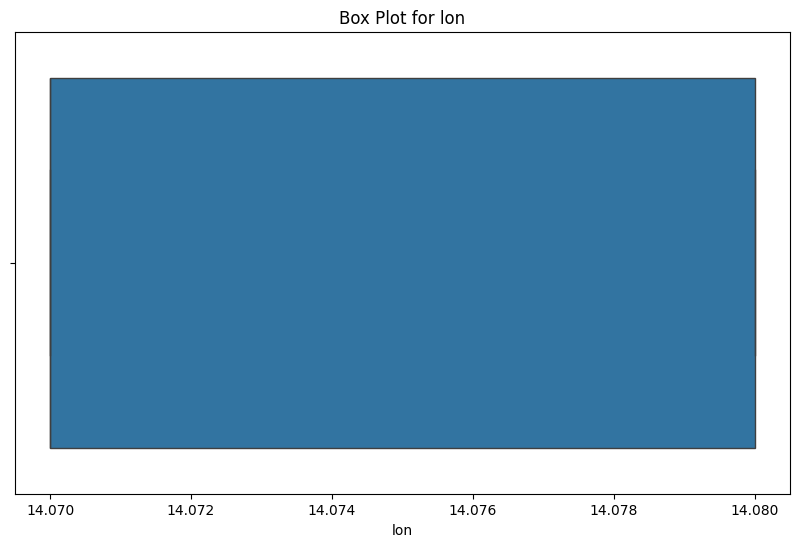

No outliers detected in lon


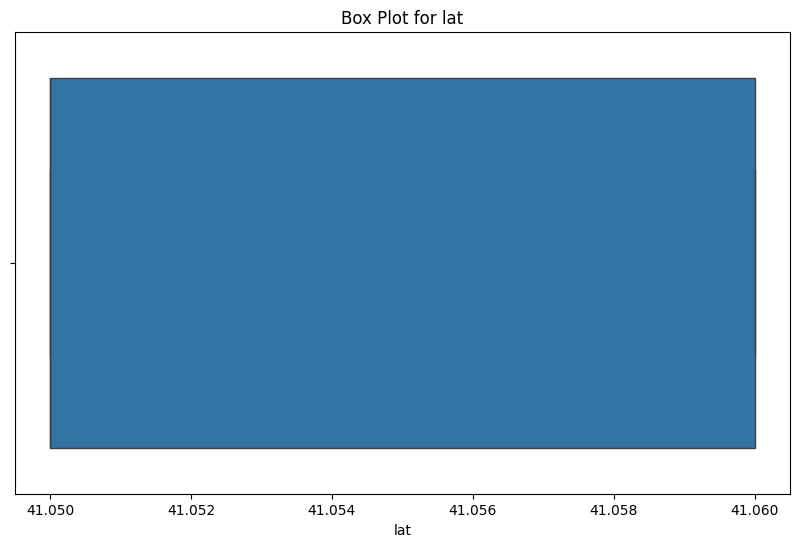

No outliers detected in lat


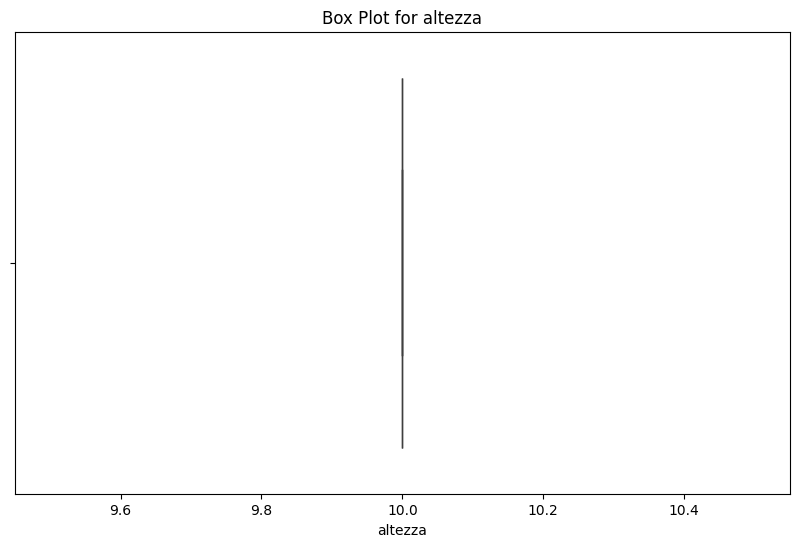

No outliers detected in altezza


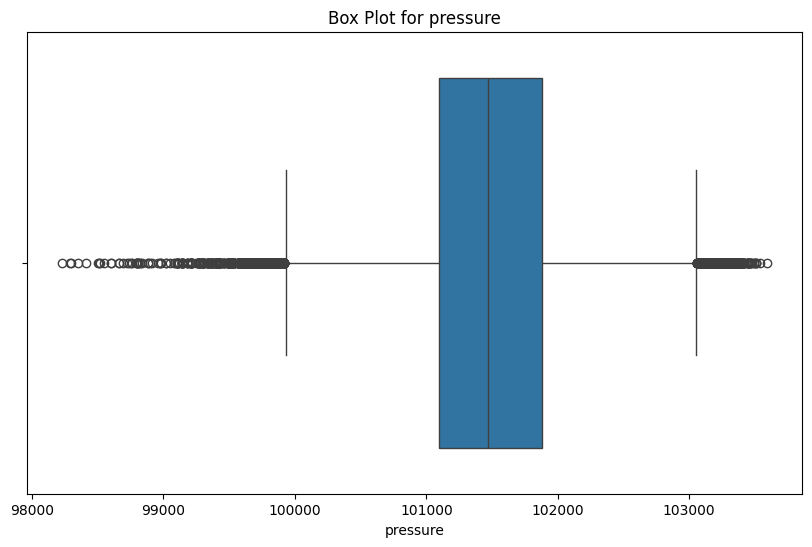

Outliers in pressure:
                   date  idstazione    lon    lat  altezza  pressure  \
34132  05/11/2013 03:00       16253  14.07  41.05       10   99810.0   
34133  05/11/2013 06:00       16253  14.07  41.05       10   99570.0   
34134  05/11/2013 09:00       16253  14.07  41.05       10   99590.0   
34135  05/11/2013 12:00       16253  14.07  41.05       10   99580.0   
34136  05/11/2013 15:00       16253  14.07  41.05       10   99520.0   
...                 ...         ...    ...    ...      ...       ...   
68951  03/11/2023 22:00       16253  14.08  41.06       10   99920.0   
68955  04/11/2023 02:00       16253  14.08  41.06       10   99900.0   
68956  04/11/2023 03:00       16253  14.08  41.06       10   99880.0   
68957  04/11/2023 04:00       16253  14.08  41.06       10   99910.0   
68959  04/11/2023 06:00       16253  14.08  41.06       10   99910.0   

       three_hour_pressure_change  char_pressure_tendency  wind_direction  \
34132                      -210.0   

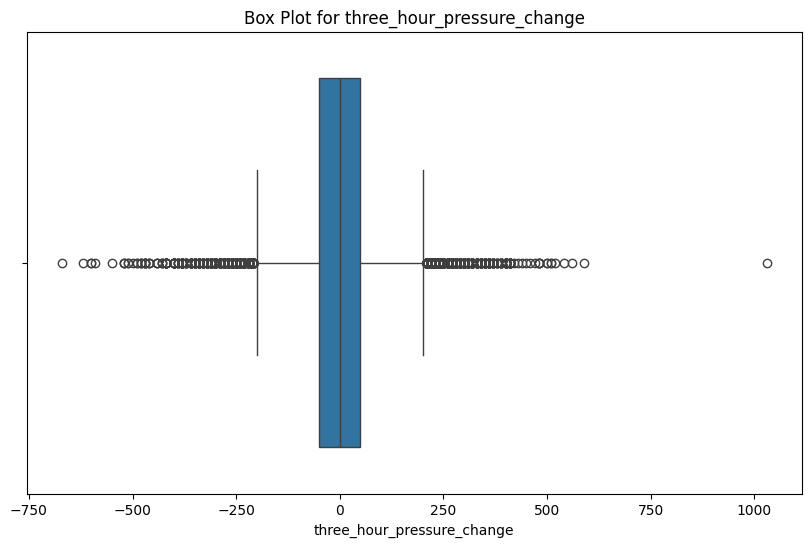

Outliers in three_hour_pressure_change:
                   date  idstazione    lon    lat  altezza  pressure  \
33741  15/09/2013 18:00       16253  14.07  41.05       10  101050.0   
33743  16/09/2013 00:00       16253  14.07  41.05       10  100750.0   
33856  30/09/2013 03:00       16253  14.07  41.05       10  100200.0   
33873  02/10/2013 09:00       16253  14.07  41.05       10  101130.0   
33876  02/10/2013 18:00       16253  14.07  41.05       10  101430.0   
...                 ...         ...    ...    ...      ...       ...   
69105  13/11/2023 08:00       16253  14.08  41.06       10  101790.0   
69170  17/11/2023 03:00       16253  14.08  41.06       10  101370.0   
69171  17/11/2023 04:00       16253  14.08  41.06       10  101350.0   
69180  17/11/2023 13:00       16253  14.08  41.06       10  101000.0   
69190  17/11/2023 23:00       16253  14.08  41.06       10  101310.0   

       three_hour_pressure_change  char_pressure_tendency  wind_direction  \
33741             

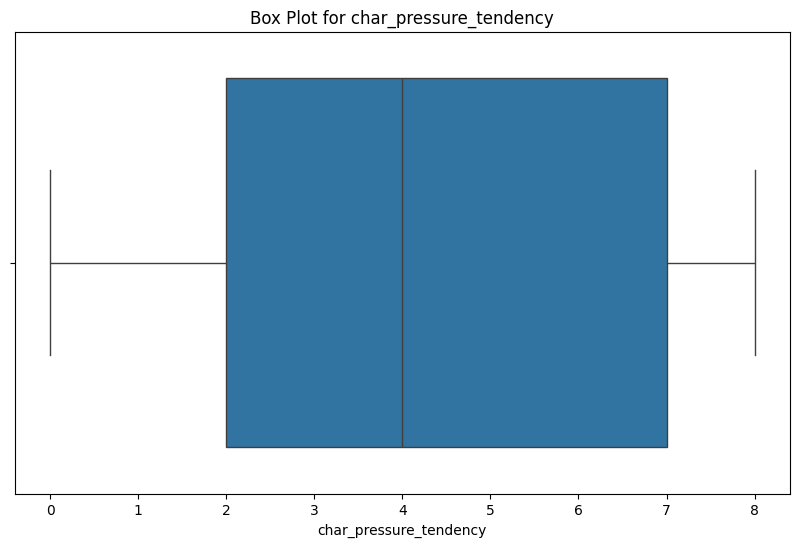

No outliers detected in char_pressure_tendency


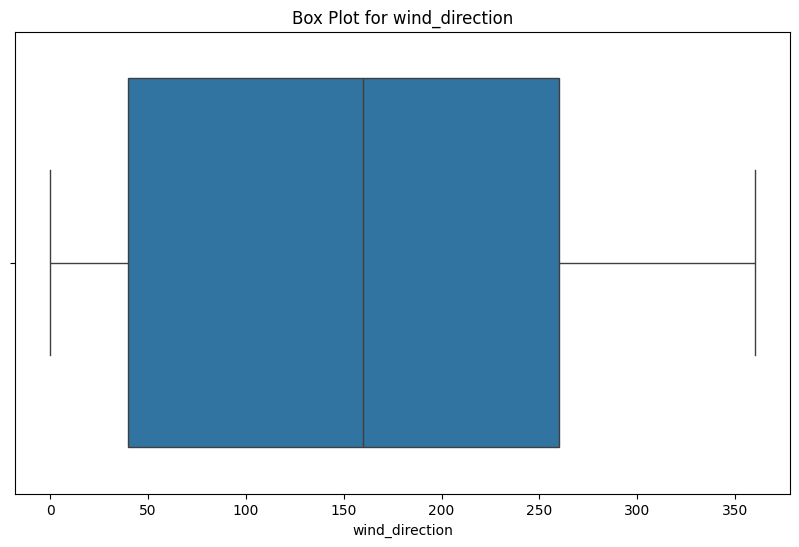

No outliers detected in wind_direction


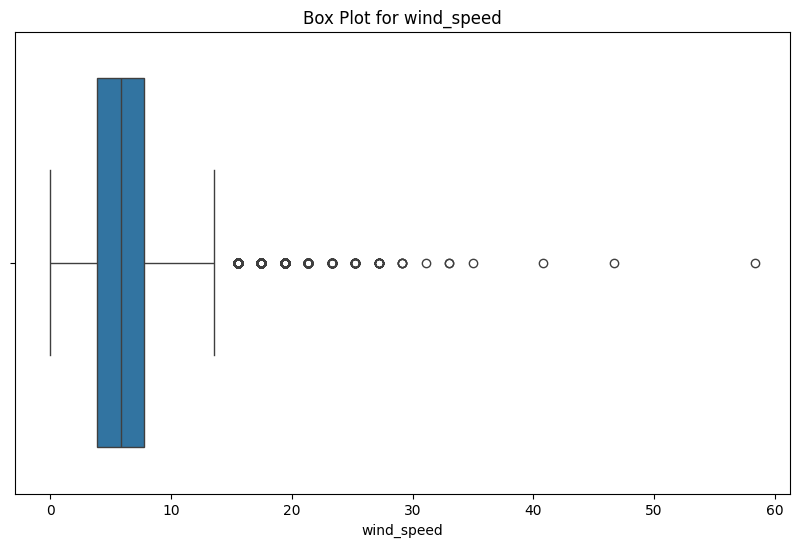

Outliers in wind_speed:
                   date  idstazione    lon    lat  altezza  pressure  \
33691  09/09/2013 12:00       16253  14.07  41.05       10  101700.0   
33754  17/09/2013 09:00       16253  14.07  41.05       10  100450.0   
33755  17/09/2013 12:00       16253  14.07  41.05       10  100380.0   
33881  03/10/2013 09:00       16253  14.07  41.05       10  102080.0   
34131  05/11/2013 00:00       16253  14.07  41.05       10  100020.0   
...                 ...         ...    ...    ...      ...       ...   
69176  17/11/2023 09:00       16253  14.08  41.06       10  101250.0   
69178  17/11/2023 11:00       16253  14.08  41.06       10  101200.0   
69179  17/11/2023 12:00       16253  14.08  41.06       10  101130.0   
69181  17/11/2023 14:00       16253  14.08  41.06       10  101030.0   
69182  17/11/2023 15:00       16253  14.08  41.06       10  101030.0   

       three_hour_pressure_change  char_pressure_tendency  wind_direction  \
33691                      -150.0 

ValueError: List of boxplot statistics and `positions` values must have same the length

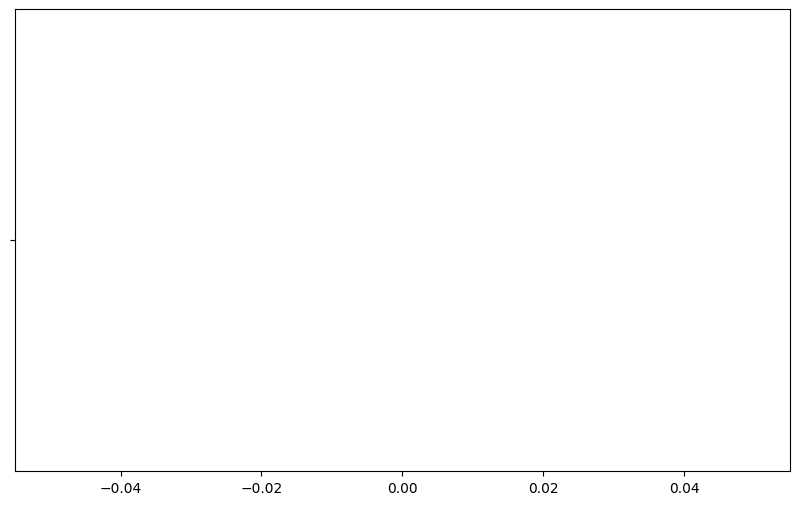

In [7]:
# Function to plot box plots and identify outliers
def plot_box_and_identify_outliers(data, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=column)
    plt.title(f"Box Plot for {column}")
    plt.show()

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)
    else:
        print(f"No outliers detected in {column}")

# Check for outliers in Grazzanise_Airport
for column in Grazzanise_Airport.select_dtypes(include=['float64', 'int64']).columns:
    plot_box_and_identify_outliers(Grazzanise_Airport, column)


In [9]:
# Function to clean date column and convert to datetime
def clean_date_column(df, column_name, date_format):
    df[column_name] = df[column_name].str.strip()
    df[column_name] = pd.to_datetime(df[column_name], format=date_format, errors='coerce')
    df.dropna(subset=[column_name], inplace=True)
    return df

# Clean and convert date columns with dayfirst parameter
Grazzanise_Airport = clean_date_column(Grazzanise_Airport, 'date', '%d/%m/%Y %H:%M')
Treviso_Airport = clean_date_column(Treviso_Airport, 'date', '%d/%m/%Y %H:%M')
Trapani_Airport = clean_date_column(Trapani_Airport, 'date', '%d/%m/%Y %H:%M')

# Set the date column as the index
Grazzanise_Airport.set_index('date', inplace=True)
Treviso_Airport.set_index('date', inplace=True)
Trapani_Airport.set_index('date', inplace=True)

In [10]:
# Function to check for stationarity
def check_stationarity(data, column):
    result = adfuller(data[column].dropna())
    adf_statistic, p_value = result[0], result[1]
    print(f'ADF Statistic for {column}: {adf_statistic}')
    print(f'p-value for {column}: {p_value}')
    return adf_statistic, p_value

print("Grazzanise Airport Visibility Stationarity Check:")
check_stationarity(Grazzanise_Airport, 'visibility')
print("\nTreviso Airport Visibility Stationarity Check:")
check_stationarity(Treviso_Airport, 'visibility')
print("\nTrapani Airport Visibility Stationarity Check:")
check_stationarity(Trapani_Airport, 'visibility')



Grazzanise Airport Visibility Stationarity Check:
ADF Statistic for visibility: -19.678438046235716
p-value for visibility: 0.0

Treviso Airport Visibility Stationarity Check:
ADF Statistic for visibility: -24.11582017470914
p-value for visibility: 0.0

Trapani Airport Visibility Stationarity Check:
ADF Statistic for visibility: -22.97147468496935
p-value for visibility: 0.0


(-22.97147468496935, 0.0)

In [11]:
# Function to apply differencing if necessary
def difference_data(data, column):
    data[f'{column}_diff'] = data[column].diff().dropna()
    return data

# Apply differencing if necessary
for df, name in zip([Grazzanise_Airport, Treviso_Airport, Trapani_Airport],
                    ['Grazzanise', 'Treviso', 'Trapani']):
    adf_stat, p_val = check_stationarity(df, 'visibility')
    if p_val > 0.05:
        print(f"Differencing required for {name} visibility.")
        df = difference_data(df, 'visibility')
        check_stationarity(df, 'visibility_diff')
    else:
        print(f"No differencing required for {name} visibility.")


ADF Statistic for visibility: -19.678438046235716
p-value for visibility: 0.0
No differencing required for Grazzanise visibility.
ADF Statistic for visibility: -24.11582017470914
p-value for visibility: 0.0
No differencing required for Treviso visibility.
ADF Statistic for visibility: -22.97147468496935
p-value for visibility: 0.0
No differencing required for Trapani visibility.


In [12]:
# Function to train ARIMA model
def train_arima_model(data, column, order):
    model = ARIMA(data[column].dropna(), order=order)
    model_fit = model.fit()
    print(model_fit.summary())
    return model_fit

# Train ARIMA model on visibility data
model_Grazzanise = train_arima_model(Grazzanise_Airport, 'visibility', (1, 1, 1))
model_Treviso = train_arima_model(Treviso_Airport, 'visibility', (1, 1, 1))
model_Trapani = train_arima_model(Trapani_Airport, 'visibility', (1, 1, 1))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             visibility   No. Observations:                35558
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -348872.865
Date:                Wed, 22 May 2024   AIC                         697751.730
Time:                        10:47:20   BIC                         697777.166
Sample:                             0   HQIC                        697759.826
                              - 35558                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7400      0.002    470.977      0.000       0.737       0.743
ma.L1         -0.9900      0.001  -1149.537      0.000      -0.992      -0.988
sigma2       1.95e+07   3.09e-11   6.31e+17      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             visibility   No. Observations:                78798
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -740331.648
Date:                Wed, 22 May 2024   AIC                        1480669.295
Time:                        10:47:25   BIC                        1480697.119
Sample:                             0   HQIC                       1480677.831
                              - 78798                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0809      0.012     -6.929      0.000      -0.104      -0.058
ma.L1         -0.0955      0.012     -8.109      0.000      -0.119      -0.072
sigma2      8.478e+06   6405.422   1323.609      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             visibility   No. Observations:                77151
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -742638.026
Date:                Wed, 22 May 2024   AIC                        1485282.052
Time:                        10:47:33   BIC                        1485309.812
Sample:                             0   HQIC                       1485290.576
                              - 77151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0509      0.034     -1.514      0.130      -0.117       0.015
ma.L1         -0.0149      0.034     -0.443      0.657      -0.081       0.051
sigma2      1.344e+07   1.66e+04    811.643      0.0

In [15]:
# Function to forecast visibility
def forecast_visibility(model, steps):
    forecast = model.forecast(steps=steps)
    return forecast

# Forecasting next 10 steps for each airport
forecast_steps = 10
forecasts_Grazzanise = forecast_visibility(model_Grazzanise, forecast_steps)
forecasts_Treviso = forecast_visibility(model_Treviso, forecast_steps)
forecasts_Trapani = forecast_visibility(model_Trapani, forecast_steps)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
